# Source:

Creator and Maintainer:

Kenta Nakai
Institue of Molecular and Cellular Biology
Osaka, University
1-3 Yamada-oka, Suita 565 Japan
nakai '@' imcb.osaka-u.ac.jp
http://www.imcb.osaka-u.ac.jp/nakai/psort.html

Donor:

Paul Horton (paulh '@' cs.berkeley.edu)


# Data Set Information:

Predicted Attribute: Localization site of protein. ( non-numeric ).

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset.

Reference: "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", Kenta Nakai & Minoru Kanehisa, PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

Reference: "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Kenta Nakai & Minoru Kanehisa, Genomics 14:897-911, 1992.


# Attribute Information:

1. Sequence Name: Accession number for the SWISS-PROT database
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. alm: Score of the ALOM membrane spanning region prediction program.
5. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
6. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
7. pox: Peroxisomal targeting signal in the C-terminus.
8. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
9. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.


# Relevant Papers:

Paul Horton & Kenta Nakai, "A Probablistic Classification System for Predicting the Cellular Localization Sites of Proteins", Intelligent Systems in Molecular Biology, 109-115. St. Louis, USA 1996.
[Web Link]

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset:

Kenta Nakai & Minoru Kanehisa, "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

Kenta Nakai & Minoru Kanehisa, "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Genomics 14:897-911, 1992.
[Web Link]




In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Understanding Data

In [190]:
df = pd.read_csv('yeast.data', delim_whitespace=True)
df.head(10)

,Sequence_Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
7,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
8,ABF2_YEAST,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT


In [191]:
names = list(df.columns)
names

['Sequence_Name',
 'mcg',
 'gvh',
 'alm',
 'mit',
 'erl',
 'pox',
 'vac',
 'nuc',
 'class']

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,0.500121,0.137299,0.11,0.41,0.49,0.58,1.00
gvh,1484.0,0.499933,0.123924,0.13,0.42,0.49,0.57,1.00
alm,1484.0,0.500034,0.086670,0.21,0.46,0.51,0.55,1.00
mit,1484.0,0.261186,0.137098,0.00,0.17,0.22,0.32,1.00
erl,1484.0,0.504717,0.048351,0.50,0.50,0.50,0.50,1.00
pox,1484.0,0.007500,0.075683,0.00,0.00,0.00,0.00,0.83
vac,1484.0,0.499885,0.057797,0.00,0.48,0.51,0.53,0.73
nuc,1484.0,0.276199,0.106491,0.00,0.22,0.22,0.30,1.00


In [193]:
df.isna().sum()

Sequence_Name    0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
class            0
dtype: int64

<AxesSubplot: >

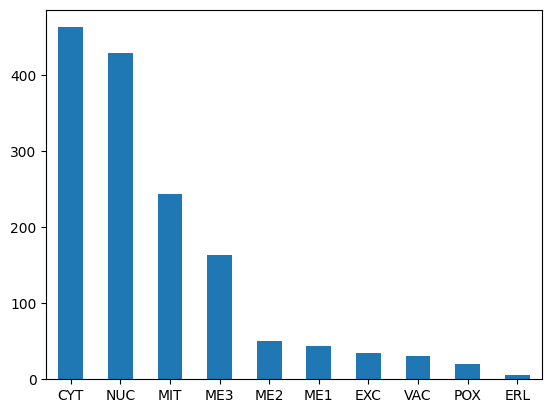

In [194]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [195]:
array = df.values
X = array[:,1:-1] 
Y = array[:,-1]
test_size = 0.25

In [196]:
X,Y

(array([[0.58, 0.61, 0.47, ..., 0.0, 0.48, 0.22],
        [0.43, 0.67, 0.48, ..., 0.0, 0.53, 0.22],
        [0.64, 0.62, 0.49, ..., 0.0, 0.53, 0.22],
        ...,
        [0.67, 0.57, 0.36, ..., 0.0, 0.56, 0.22],
        [0.43, 0.4, 0.6, ..., 0.0, 0.53, 0.39],
        [0.65, 0.54, 0.54, ..., 0.0, 0.53, 0.22]], dtype=object),
 array(['MIT', 'MIT', 'MIT', ..., 'ME2', 'NUC', 'CYT'], dtype=object))

# Normalize Data

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x_scaled[0]

array([0.52808989, 0.55172414, 0.32911392, 0.13      , 0.        ,
       0.        , 0.65753425, 0.22      ])

In [198]:
pd.DataFrame(x_scaled, columns=names[1:-1]).head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.528090,0.551724,0.329114,0.13,0.0,0.0,0.657534,0.22
1,0.359551,0.620690,0.341772,0.27,0.0,0.0,0.726027,0.22
2,0.595506,0.563218,0.354430,0.15,0.0,0.0,0.726027,0.22
3,0.528090,0.356322,0.455696,0.13,0.0,0.0,0.739726,0.22
4,0.348315,0.356322,0.341772,0.54,0.0,0.0,0.657534,0.22


# Building Models

In [199]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [200]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_scaled, Y, test_size=test_size, random_state=7)

## KNN n = 5

In [201]:
from sklearn.neighbors import KNeighborsClassifier
KNN_5 = KNeighborsClassifier(n_neighbors=5)
history_KNN_5 = KNN_5.fit(X_train, Y_train)

In [202]:
Y_predict_KNN_5 = KNN_5.predict(X_test)

In [203]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_KNN_5))
rp_knn_5 = (metrics.classification_report(Y_test, Y_predict_KNN_5))
print(rp_knn_5)

[[77  0  0  0  0  1 11 29  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 2  0  3  2  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 2  0  2  2  6  2  1  1  0  0]
 [ 7  0  0  0  0 41  1  4  0  0]
 [16  0  3  1  1  3 29  4  1  0]
 [42  0  1  0  1  5  6 46  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.52      0.65      0.58       118
         ERL       1.00      1.00      1.00         2
         EXC       0.30      0.43      0.35         7
         ME1       0.64      0.90      0.75        10
         ME2       0.75      0.38      0.50        16
         ME3       0.77      0.77      0.77        53
         MIT       0.60      0.50      0.55        58
         NUC       0.54      0.46      0.49       101
         POX       0.50      0.50      0.50         2
         VAC       0.00      0.00      0.00         4

    accuracy                           0.58       371
   macro avg       

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN n = 3

In [204]:
from sklearn.neighbors import KNeighborsClassifier
KNN_3 = KNeighborsClassifier(n_neighbors=3)
history_KNN_3 = KNN_3.fit(X_train, Y_train)

In [205]:
Y_predict_KNN_3 = KNN_3.predict(X_test)

In [206]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_KNN_3))
rp_knn_3 = (metrics.classification_report(Y_test, Y_predict_KNN_3))
print(rp_knn_3)

[[71  0  0  0  1  2 11 33  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 1  0  3  2  0  0  1  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 3  0  3  1  4  1  2  2  0  0]
 [ 8  0  0  0  3 36  3  2  0  1]
 [16  0  2  1  1  3 28  6  1  0]
 [41  1  0  0  2  4  6 47  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.49      0.60      0.54       118
         ERL       0.67      1.00      0.80         2
         EXC       0.33      0.43      0.38         7
         ME1       0.69      0.90      0.78        10
         ME2       0.36      0.25      0.30        16
         ME3       0.77      0.68      0.72        53
         MIT       0.55      0.48      0.51        58
         NUC       0.52      0.47      0.49       101
         POX       0.00      0.00      0.00         2
         VAC       0.00      0.00      0.00         4

    accuracy                           0.54       371
   macro avg       

## weighted KNN n = 5

In [207]:
from sklearn.neighbors import KNeighborsClassifier
weighted_KNN_5 = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
history_weighted_KNN_5 = weighted_KNN_5.fit(X_train, Y_train)

In [208]:
Y_predict_weighted_KNN_5 = KNN_5.predict(X_test)

In [209]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_weighted_KNN_5))
print(classification_report(Y_test,Y_predict_weighted_KNN_5))
rp_w_knn_5 = (metrics.classification_report(Y_test, Y_predict_weighted_KNN_5))
print(rp_w_knn_5)

[[77  0  0  0  0  1 11 29  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 2  0  3  2  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 2  0  2  2  6  2  1  1  0  0]
 [ 7  0  0  0  0 41  1  4  0  0]
 [16  0  3  1  1  3 29  4  1  0]
 [42  0  1  0  1  5  6 46  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.52      0.65      0.58       118
         ERL       1.00      1.00      1.00         2
         EXC       0.30      0.43      0.35         7
         ME1       0.64      0.90      0.75        10
         ME2       0.75      0.38      0.50        16
         ME3       0.77      0.77      0.77        53
         MIT       0.60      0.50      0.55        58
         NUC       0.54      0.46      0.49       101
         POX       0.50      0.50      0.50         2
         VAC       0.00      0.00      0.00         4

    accuracy                           0.58       371
   macro avg       

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarn

## weighted KNN n = 3

In [210]:
from sklearn.neighbors import KNeighborsClassifier
weighted_KNN_3 = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
history_weighted_KNN_3 = weighted_KNN_3.fit(X_train, Y_train)

In [211]:
Y_predict_weighted_KNN_3 = weighted_KNN_3.predict(X_test)

In [212]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_weighted_KNN_3))
rp_w_knn_3 = (metrics.classification_report(Y_test, Y_predict_weighted_KNN_3))
print(rp_w_knn_3)

[[60  0  0  0  3  2 15 37  0  1]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 1  0  3  2  0  0  1  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 3  0  3  1  2  2  2  2  0  1]
 [ 7  0  0  0  2 37  4  3  0  0]
 [11  0  3  1  2  3 30  7  1  0]
 [30  0  0  0  1  5  9 55  0  1]
 [ 0  0  0  0  0  0  1  1  0  0]
 [ 2  0  0  0  0  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.53      0.51      0.52       118
         ERL       1.00      1.00      1.00         2
         EXC       0.30      0.43      0.35         7
         ME1       0.69      0.90      0.78        10
         ME2       0.20      0.12      0.15        16
         ME3       0.74      0.70      0.72        53
         MIT       0.48      0.52      0.50        58
         NUC       0.52      0.54      0.53       101
         POX       0.00      0.00      0.00         2
         VAC       0.00      0.00      0.00         4

    accuracy                           0.53       371
   macro avg       

# Gaussian NB

In [213]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)
print(model)

GaussianNB()


In [214]:
Y_predict_Gau_NB = model.predict(X_test)

print(metrics.confusion_matrix(Y_test, Y_predict_Gau_NB))
rp_gau_NB = (metrics.classification_report(Y_test, Y_predict_Gau_NB))
print(rp_gau_NB)

[[  0   0   6   0   1   0   2   8   0 101]
 [  0   0   0   0   2   0   0   0   0   0]
 [  0   0   5   1   0   0   0   0   0   1]
 [  0   0   4   6   0   0   0   0   0   0]
 [  0   0   3   5   0   0   0   0   0   8]
 [  0   0   0   0   0   0   0   2   0  51]
 [  0   0   9   2   0   0   9   1   1  36]
 [  0   1   3   0   1   0   0  17   0  79]
 [  0   0   0   0   0   0   0   0   1   1]
 [  0   0   0   0   0   0   0   0   0   4]]
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00       118
         ERL       0.00      0.00      0.00         2
         EXC       0.17      0.71      0.27         7
         ME1       0.43      0.60      0.50        10
         ME2       0.00      0.00      0.00        16
         ME3       0.00      0.00      0.00        53
         MIT       0.82      0.16      0.26        58
         NUC       0.61      0.17      0.26       101
         POX       0.50      0.50      0.50         2
         VAC       0.01     

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multinomial NB

In [215]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)
print(model)

MultinomialNB()


In [216]:
Y_predict_Multi_NB = model.predict(X_test)

print(metrics.confusion_matrix(Y_test, Y_predict_Multi_NB))
rp_multi_NB = (metrics.classification_report(Y_test, Y_predict_Multi_NB))
print(rp_multi_NB)

[[112   0   0   0   0   0   0   6   0   0]
 [  2   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0   0]
 [ 50   0   0   0   0   0   0   3   0   0]
 [ 56   0   0   0   0   0   0   1   1   0]
 [ 86   0   0   0   0   0   0  15   0   0]
 [  1   0   0   0   0   0   1   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         CYT       0.33      0.95      0.48       118
         ERL       0.00      0.00      0.00         2
         EXC       0.00      0.00      0.00         7
         ME1       0.00      0.00      0.00        10
         ME2       0.00      0.00      0.00        16
         ME3       0.00      0.00      0.00        53
         MIT       0.00      0.00      0.00        58
         NUC       0.60      0.15      0.24       101
         POX       0.00      0.00      0.00         2
         VAC       0.00     

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plotting and Comparing

In [217]:
# plt.plot(rp_gau_NB['accuracy'])
# rp_gau_NB

TypeError: string indices must be integers, not 'str'